In [1]:
1+8

9

In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [11]:
import os
print(os.getcwd())

C:\Users\user\Desktop\ML-4-Beginners-Arewa-Datascience-main\week_003


In [13]:
birds = pd.read_csv("C:\\Users\\user\\Desktop\\ML-4-Beginners-Arewa-Datascience-main\\week_003\\birds.csv")
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


## finding the maximum wing span

<Axes: >

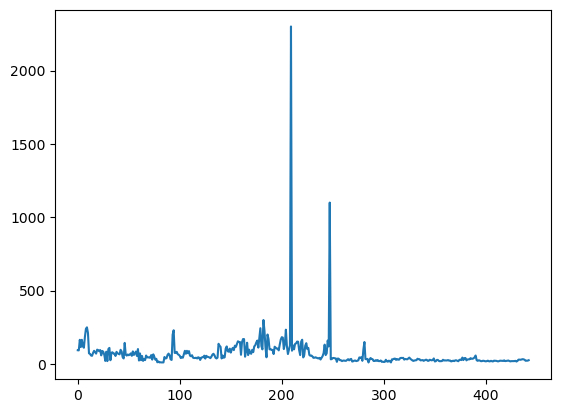

In [15]:
wingspan = birds['MaxWingspan'] 
wingspan.plot()

## lets investigate if there are Pterodactyls roaming Minnesota?

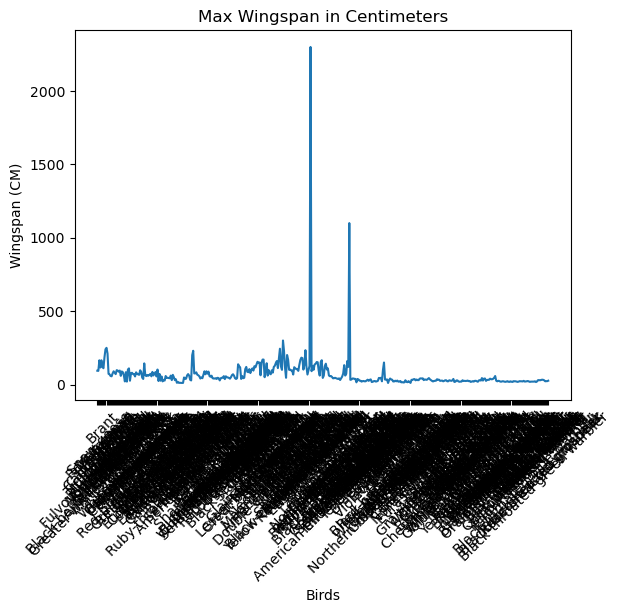

In [16]:
## Add labels to the x-axis to show what kind of birds are in question:

plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.xticks(rotation=45) # label orientation or rotation
x = birds['Name'] 
y = birds['MaxWingspan']

plt.plot(x, y)

plt.show()

## Even with the rotation of the labels set to 45 degrees, there are too many to read. Let's try a different strategy: label only those outliers and set the labels within the chart. We can use a scatter chart to make more room for the labeling:


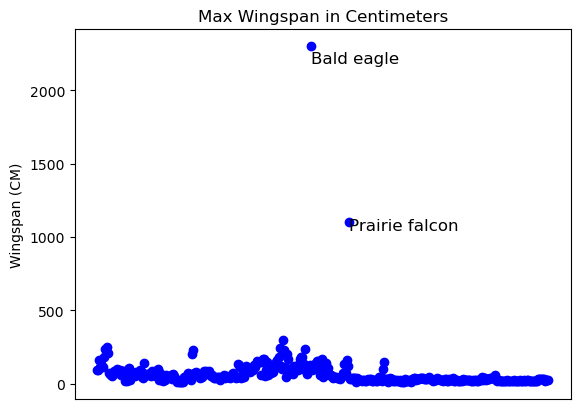

In [18]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), birds['Name'][i], fontsize=12)
    
plt.show()

What's going on here? You used `tick_params` to hide the bottom labels and then created a loop over your birds dataset. Plotting the chart with small round blue dots by using `bo`, you checked for any bird with a maximum wingspan over 500 and displayed their label next to the dot if so. You offset the labels a little on the y axis (`y * (1 - 0.05)`) and used the bird name as a label.

What did you discover?

## Filter your data

Both the Bald Eagle and the Prairie Falcon, while probably very large birds, appear to be mislabeled, with an extra `0` added to their maximum wingspan. It's unlikely that you'll meet a Bald Eagle with a 25 meter wingspan, but if so, please let us know! Let's create a new dataframe without those two outliers:

By filtering out outliers, the data is now more cohesive and understandable.

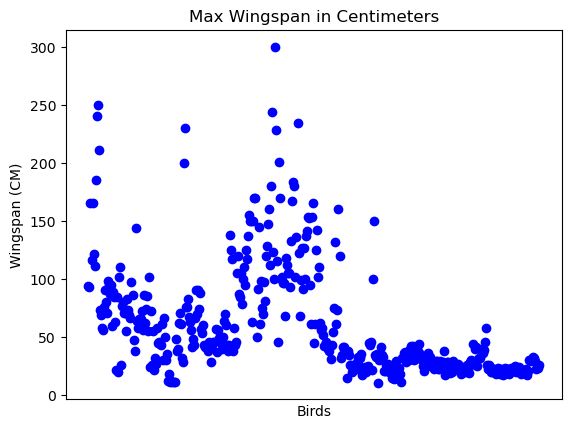

In [20]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')
plt.show()

Now that we have a cleaner dataset at least in terms of wingspan, let's discover more about these birds.

While line and scatter plots can display information about data values and their distributions, we want to think about the values inherent in this dataset. You could create visualizations to answer the following questions about quantity:

> How many categories of birds are there, and what are their numbers?
> How many birds are extinct, endangered, rare, or common?
> How many are there of the various genus and orders in Linnaeus's terminology?
## Explore bar charts

Bar charts are practical when you need to show groupings of data. Let's explore the categories of birds that exist in this dataset to see which is the most common by number.

In the notebook file, create a basic bar chart

✅ Note, you can either filter out the two outlier birds we identified in the previous section, edit the typo in their wingspan, or leave them in for these exercises which do not depend on wingspan values.

If you want to create a bar chart, you can select the data you want to focus on. Bar charts can be created from raw data:


<Axes: title={'center': 'Birds of Minnesota'}, xlabel='Category'>

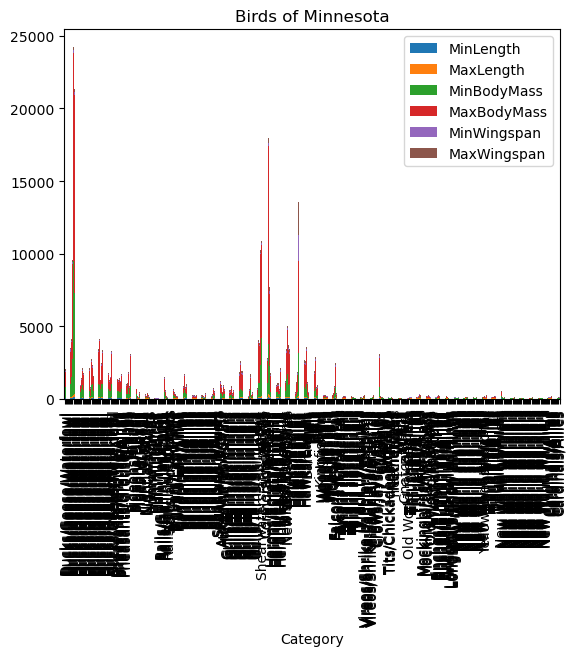

In [22]:
birds.plot(x='Category',
        kind='bar',
        stacked=True,
        title='Birds of Minnesota')

This bar chart, however, is unreadable because there is too much non-grouped data. You need to select only the data that you want to plot, so let's look at the length of birds based on their category. 

Filter your data to include only the bird's category. 

✅ Notice that you use Pandas to manage the data, and then let Matplotlib do the charting.

Since there are many categories, you can display this chart vertically and tweak its height to account for all the data:


<Axes: >

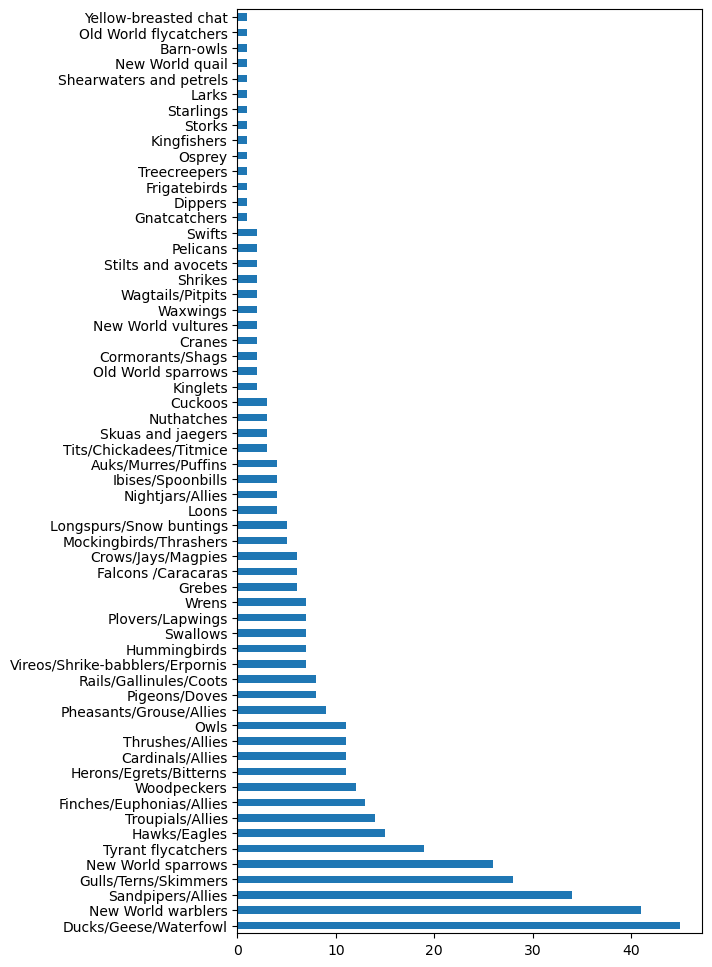

In [23]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()